### Clustering (K-Means)

### What is Unsupervised Learning?

In supervised learning, we have data with labels.
👉 Example: Email dataset labeled as spam or not spam.

In unsupervised learning, we only have data without labels.
👉 Example: We have a bunch of emails, but we don’t know which are spam.

So in unsupervised learning, the algorithm tries to find patterns or groups on its own.

🌟 What is Clustering?

Clustering = grouping similar items together automatically.

The algorithm looks at the data and puts “similar ones” in the same cluster.

🛒 Real-life Examples

Market Segmentation (Shopping Mall):

A mall has customer data (age, income, spending habits).

Without any labels, clustering can group customers into:

Budget shoppers,

Luxury shoppers,

Average spenders.

Later, the mall can use these groups for marketing.

### What is K-Means?

K-Means is the most popular clustering algorithm.

It groups data into k clusters (you decide k).

Each cluster has a center point called the centroid.

### 🔎 Step-by-step working of K-Means

Choose k (number of clusters)
👉 Example: You want to divide mall customers into 3 groups (budget, average, luxury).

Initialize k centroids randomly
👉 Imagine you place 3 “flags” randomly on the shopping mall floor.

Assign each data point to nearest centroid
👉 Each customer walks to the nearest flag based on age/income similarity.
👉 Now you have 3 rough groups.

Update centroids
👉 Move each flag to the center of the group of customers that chose it.

Repeat steps 3 & 4 until centroids stop moving (or move very little).

### 🏏 Example: IPL Cricket Fans

Imagine we survey IPL fans based on:

Age

Money spent on merchandise (jerseys, caps, tickets)

We want to group them into k = 3 clusters.

Step 1: Choose k = 3

We decide there are 3 types of fans we want to find.

Step 2: Place 3 random centroids

Think of putting 3 flags in the stadium randomly.

Step 3: Assign fans to nearest flag

Each fan goes to the flag (group) closest to them based on their age & money spent.

Young teenagers who spend little → Group A

Middle-aged office-goers who spend medium → Group B

Rich businesspeople spending a lot → Group C

Step 4: Move flags to the center

Now, move each flag to the average position of its group (center of fans).

Step 5: Repeat steps 3 & 4

Fans may switch to another closer flag.

Flags keep moving until they stabilize.

### Topic 3: Elbow Method super simple using IPL cricket fans.

🌟 Problem

We don’t know how many types of IPL fans exist.

Are there just 2 groups? (Budget vs Luxury)

Or 3 groups? (Budget, Average, Luxury)

Or maybe 5 groups?

We need a way to decide the right number of groups (k).

🌟 Elbow Method (Simple IPL Example)

Suppose we try k=1 → put all fans in one group.
👉 Too broad, useless.

Try k=2 → split into Budget fans and Luxury fans.
👉 Better, but still too general.

Try k=3 → split into Budget, Average, and Luxury fans.
👉 Looks natural.

Try k=4 or 5 → groups become too detailed, not very useful.

🌟 The “Elbow”

If you plot number of groups (k) vs error (how far fans are from their group center):

At first, error drops a lot (big improvement).

After some point, adding more groups doesn’t improve much.

That “bend” in the curve looks like an elbow of your arm.
👉 That elbow point is the best k (e.g., 3 for IPL fans).

🎯 Analogy

Think of how many ticket price categories IPL should have:

1 price for all = unfair.

3 categories (cheap, medium, VIP) = practical.

10 categories = too messy.
👉 The elbow method tells you that 3 is the sweet spot.

✅ In short:
The Elbow Method is like asking:
"What is the best number of IPL fan groups so that fans are grouped well, but not overcomplicated?"

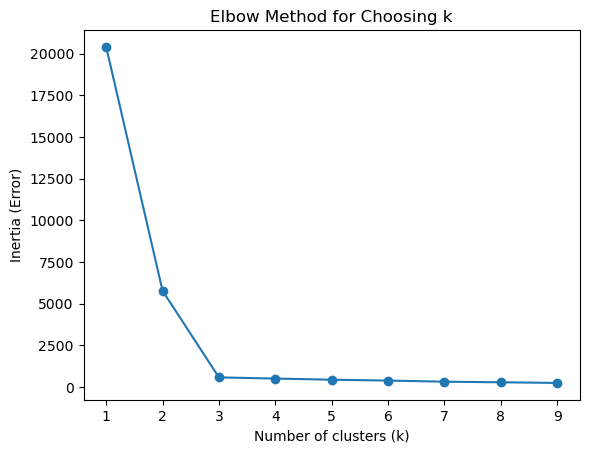

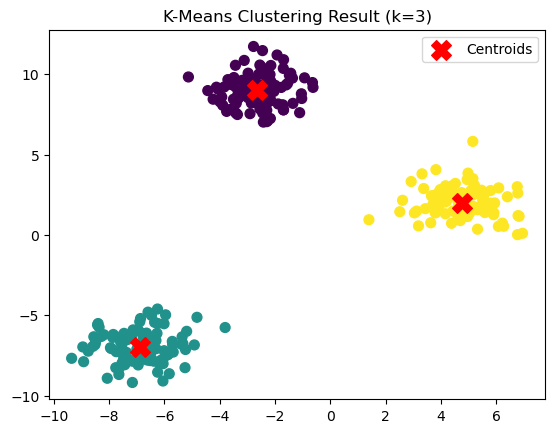

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Create synthetic dataset (like IPL fans: age, spending score)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Elbow Method - run KMeans for different k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # total within-cluster distance

# Step 3: Plot Elbow Curve
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Error)")
plt.title("Elbow Method for Choosing k")
plt.show()

# Step 4: Train final KMeans with k=3 (best choice from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Step 5: Plot final clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering Result (k=3)")
plt.legend()
plt.show()
